## Gradient et dérivée d'un potentiel harmonique défini au moyen d'un tableau

On se donne un potentiel harmonique $\mathrm V = \omega x^2$ dans un tableau.
Le programme ci-dessous calcule la valeur du potentiel en un point donné (interpolation du tableau), et détermine la dérivée du potentiel en ce point.

Pour un potentiel $V(x)$ non spécifié a priori, le Lagrangien s'écrit :
$$
\mathrm{L}(x, \dot{x}) = \frac{1}{2}m \dot{x}^2-V(x)
$$
Et on aura pour l'équation de Lagrange  $$\frac{d}{dt}[\frac{\partial\mathrm{L}}{\partial\dot{x}}]=\frac{dV}{d{x}}\implies \boxed{ \ddot{x}= V'(x)}
$$

Le principe de l'intégration "leapfrog" s'écrit maintenant :


\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{\Delta t} & = & v_{n+1} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1) \\
\frac{v_{n+1}-v_{n}}{\Delta t} & = & x_n.V'(x_n) \;\;\;\;\;\;\;\;\;\;\; \;(2)
\end{eqnarray}

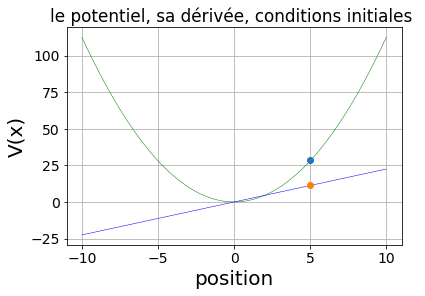

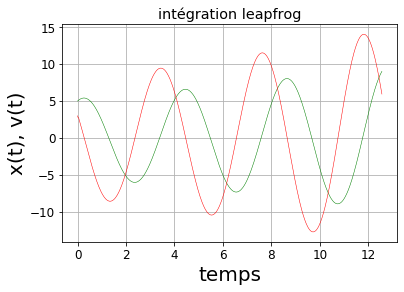

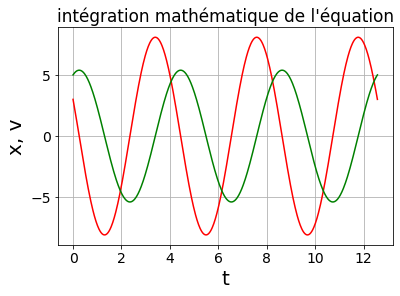

In [73]:
from pylab import *
import numpy as np
###############################################################################
# Entrée des paramètres +/-l limites d'espace, xp point courant, Nn pas, omeg pulsation

l=10.0
Nn=500
xp = np.linspace(-l, l, Nn)
s = np.linspace(-l, l, Nn-1) #utilisé pour les vecteurs dérivés qui n'ont que Nn-1 composantes
dxp=xp[1]-xp[0]
ds=s[1]-s[0]

##################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm

Mm=600
omeg=1.5
tps=3*2*3.141596/omeg #temps caractéristique posé égal à 3 fois la période
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# chargement du potentiel quadratique

V = (omeg**2/2)*xp**2

###############################################################################
# Conditions initiales
x0=5.0
v0=3.0






###############################################################################
# calcul de la valeur du potentiel en un point x avec interpolation
def potiel(x,l,Nn, V):
        i=int(Nn*(x+l)/(2*l))
        r=Nn*(x+l)/(2*l)-i
        pot=V[i]+r*(V[i+1]-V[i])
        return pot

###############################################################################
# calcul de la dérivée du potentiel sous forme vectorielle à Nn-1 points
def dVdx(l, Nn, V):
        deltaV=zeros(Nn-1)
        for i in range(0,Nn-1):
                deltaV[i]=(V[i+1]-V[i])*((Nn)/(2*l))
        return deltaV

    
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x avec interpolation
def derivpot(z,l,Nn, Vprim):
        i=int((Nn-1)*(z+l)/(2*l))
        r=(Nn-1)*(z+l)/(2*l)-i
        pot=(Vprim[i]+r*(Vprim[i+1]-Vprim[i]))
    
        return pot


###############################################################################
# création de la fonction resoudre
def resoudre(x0,v0):
###########################################################################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
    
###########################################################################
# Intégration "leapfrog"
    k0= derivpot(x[0],l,Nn,Vprim)
   
    for i in range(Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i-1],l,Nn,Vprim)
        
###########################################################################
# Solution
    return x,v
    
    
    
    
    

    
##############################################################################
#retour programme principal
Vprim=dVdx(l,Nn,V) 

x,v = resoudre(x0,v0) 


    
###############################################################################
# représentation graphique
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()

plt.plot(xp,V,'g',linewidth=0.5)
plt.plot(x0,potiel(x0,l,Nn, V),"o")
plt.plot(s,Vprim, 'b',linewidth=0.5)
plt.plot(x0,derivpot(x0,l,Nn, Vprim),"o")

xlabel("position")
ylabel("V(x)")
plt.title ("le potentiel, sa dérivée, conditions initiales ")
###############################################################################
show()


###############################################################################
# représentation graphique leapfrog
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20
figure()
plt.plot(tp,x,'g',linewidth=0.5)
plt.plot(tp,v,'r',linewidth=0.5)
xlabel("temps")
ylabel("x(t), v(t)")
plt.title ("intégration leapfrog")
###############################################################################
show()
###############################################################################




##########################################################################
# résolution numérique directe
phi=math.atan(omeg*x0/v0)
A=x0/sin(phi)

S=A*sin(phi+omeg*tp)

COS=omeg*A*cos(phi+omeg*tp)
###############################################################################
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(tp,COS,'r')
plt.plot(tp,S,'g')
xlabel("t")
ylabel("x, v")
plt.title ("intégration mathématique de l'équation")

show()

